### **Women's E-Commerce Clothing Reviews**

Dataset: https://www.kaggle.com/gourabroy553/women-s-e-commerce-clothing-reviews



Resources:
*   https://www.datacamp.com/community/tutorials/wordcloud-python
*   https://pbpython.com/selecting-columns.html





In [ ]:
pip install chart_studio

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob
import plotly as py
import cufflinks as cf
from matplotlib.gridspec import GridSpec
from plotly.offline import iplot
% matplotlib inline

In [ ]:
# Read data from csv as dataframe 
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
# Find dimensions
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 23486 observations and 11 features in this dataset. 



In [ ]:
# Rename column
df.rename(columns={'Review Text':'Review_Text'}, inplace=True)

# Remove null values - uneccessary because null values are reviews with no titles
#df = df.dropna(how='any',axis=0) 

# Show five rows
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
# Quantify ratings data
df.groupby('Rating').count()

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_len,word_count,avg_word_len
Rating,,,,,,,,,,,,,,
1,842,842,842,691,842,842,842,842,842,842,842,842,842,842
2,1565,1565,1565,1360,1565,1565,1565,1565,1565,1565,1565,1565,1565,1565
3,2871,2871,2871,2464,2871,2871,2871,2871,2871,2871,2871,2871,2871,2871
4,5077,5077,5077,4289,5077,5077,5077,5077,5077,5077,5077,5077,5077,5077
5,13131,13131,13131,10872,13131,13131,13131,13117,13117,13117,13131,13131,13131,13131


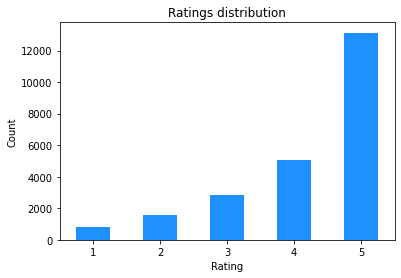

In [ ]:
# View quantity distribution of ratings (1.0 to 5.0 out of 5.0)
df['Rating'].value_counts(ascending=True).plot.bar(color=colors)
plt.title('Ratings distribution')
plt.xlabel("Rating")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

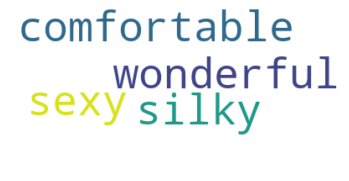

In [ ]:
# Start with one review
text = df.Review_Text[0]

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Absolutely"])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
# Ensure that review text is in string format
df['Review_Text'] = df['Review_Text'].astype('str')

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [ ]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df['Review_Text'] = df['Review_Text'].apply(lambda x: cont_to_exp(x))

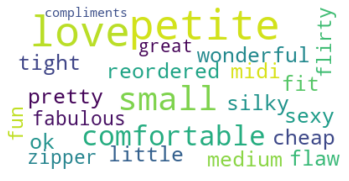

In [ ]:
# Join the review text together
all = ' '.join(df['Review_Text'].tolist())[:1000]

# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["Absolutely", "bc", "so", "sooo", "really", "happened", "wanted", "hopes", "ordered", "truly", "true", "find", "store", "someone", 
                  "overall", "initially", "found", "zip", "usual", "somewhat", "nothing", "online", "glad", "definitely", "outrageously", "never", "hits",
                  "net", "layer", "layers", "bought", "imo", "major", "work", "directly", "several", "sewn", "time", "ve", "nicely", "knee", "every",
                  "length", "wear", "high", "size", "bottom", "dress", "half", "fact", "shirt", "top", "design", "jumpsuit", "5'8"])

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(all)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Quantify department data
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [ ]:
df.groupby('Department Name').count()

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Class Name
Department Name,,,,,,,,,,
Bottoms,3799,3799,3799,3184,3799,3799,3799,3799,3799,3799
Dresses,6319,6319,6319,5372,6319,6319,6319,6319,6319,6319
Intimate,1735,1735,1735,1408,1735,1735,1735,1735,1735,1735
Jackets,1032,1032,1032,879,1032,1032,1032,1032,1032,1032
Tops,10468,10468,10468,8713,10468,10468,10468,10468,10468,10468
Trend,119,119,119,107,119,119,119,119,119,119


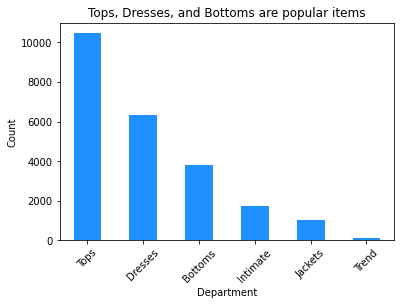

In [ ]:
# Visualize department data
df['Department Name'].value_counts().plot.bar(color=colors)
plt.title("Tops, Dresses, and Bottoms are popular items")
plt.xlabel("Department")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show()

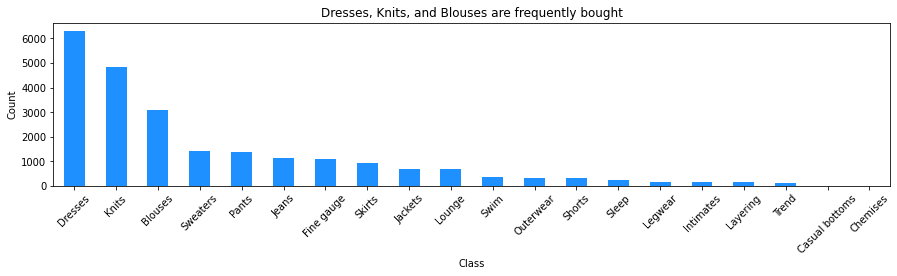

In [ ]:
# Visualize class data
plt.figure(figsize=(15, 3)) 
df['Class Name'].value_counts().plot.bar(color=colors)
plt.title("Dresses, Knits, and Blouses are frequently bought")
plt.xlabel("Class")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.show()

In [ ]:
df['polarity'] = df['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['review_len'] = df['Review_Text'].apply(lambda x: len(x))

df['word_count'] = df['Review_Text'].apply(lambda x: len(x.split()))

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

df['avg_word_len'] = df['Review_Text'].apply(lambda x: get_avg_word_len(x))

In [ ]:
print("Mean \n----")
df.mean()

Mean 
----


Unnamed: 0                 11742.500000
Clothing ID                  918.118709
Age                           43.198544
Rating                         4.196032
Recommended IND                0.822362
Positive Feedback Count        2.535936
polarity                       0.240835
review_len                   297.689602
word_count                    58.066848
avg_word_len                   4.151461
dtype: float64

In [ ]:
print("Median \n------")
df.median()

Median 
------


Unnamed: 0                 11742.500000
Clothing ID                  936.000000
Age                           41.000000
Rating                         5.000000
Recommended IND                1.000000
Positive Feedback Count        1.000000
polarity                       0.232450
review_len                   292.000000
word_count                    57.000000
avg_word_len                   4.132653
dtype: float64

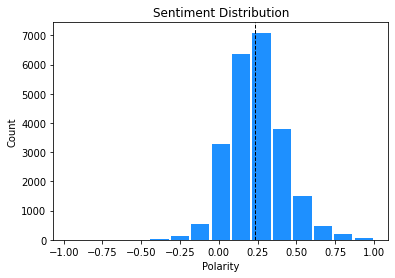

In [ ]:
# Visualize polarity data
plt.hist(df['polarity'], 
         bins = 15,
         #histtype='stepfilled', 
         #align='mid',
         color=colors,
         rwidth=0.9
         )
plt.title("Sentiment Distribution")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.axvline(df['polarity'].median(), color='k', linestyle='dashed', linewidth=1)
plt.show()

In [ ]:
# Filter reviews with low sentiment and rating
lowPolarity = df[((df['polarity']<0.23) & (df['Rating']<3))]
print("Rows:", lowPolarity.shape[0])
print("Columns:", lowPolarity.shape[1], "\n")
lowPolarity['Department Name'].value_counts()

Rows: 1896
Columns: 15 



Tops        861
Dresses     530
Bottoms     263
Intimate    124
Jackets      98
Trend        20
Name: Department Name, dtype: int64

In [ ]:
# View reviews with low sentiment and rating
lowPolarity.sort_values(by=['Rating', 'polarity'], ascending=True, inplace=True)
lowPolarity.head()

# Company should reach out to these reviewers for more information and try to rectify any issues.

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_len,word_count,avg_word_len
14754,14754,868,52,Terrible quality cut,"Cut out design, no seems or hems.\r\n very disappointed in retailer",1,0,0,General,Tops,Knits,-0.975000,65,11,4.818182
20502,20502,870,61,NaN,Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse,1,0,1,General,Tops,Knits,-0.975000,121,21,4.809524
5114,5114,863,52,Save your money,"What a disappointment and for the price, it's outrageous!",1,0,1,General,Tops,Knits,-0.800000,57,9,5.444444
10364,10364,1039,44,Don't bother,"These are terribly unflattering the wash looks dirty and the rise is not 10.5 like the description says, which is the only reason i gambled on these it is 13"".",1,0,0,General,Bottoms,Jeans,-0.533333,159,30,4.333333
13481,13481,1094,51,Weird,This dress just fits weird. maybe it works for somebody..... there is a reason it has been put on sale...,1,0,1,General,Dresses,Dresses,-0.500000,105,20,4.300000


In [ ]:
# View record with lowest sentiment
pd.set_option('display.max_colwidth', None)
lowPolarity.iloc[[0]]

# Keywords include 'disappointed'

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity,review_len,word_count,avg_word_len
14754,14754,868,52,Terrible quality cut,"Cut out design, no seems or hems.\r\n very disappointed in retailer",1,0,0,General,Tops,Knits,-0.975,65,11,4.818182


In [ ]:
# View records with keyword: 'disappointed'
# lowPolarity.filter(like='disappoint', axis=1)
location_cols = lowPolarity.columns.str.contains('disappoint|disappointed|disappointing|disappointed|disappointment',
                                        case=False)
location_indices = [i for i, col in enumerate(location_cols) if col]
lowPolarity.iloc[:, np.r_[0:12,location_indices]].head(3)

# Disappointing issues include: quality control, no seems or hems, gaping hole

,Unnamed: 0,Clothing ID,Age,Title,Review_Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,polarity
14754,14754,868,52,Terrible quality cut,"Cut out design, no seems or hems.\r\n very disappointed in retailer",1,0,0,General,Tops,Knits,-0.975
20502,20502,870,61,NaN,Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse,1,0,1,General,Tops,Knits,-0.975
5114,5114,863,52,Save your money,"What a disappointment and for the price, it's outrageous!",1,0,1,General,Tops,Knits,-0.800
